In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Get the data from [California Housing Price](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [3]:
data = pd.read_csv("housing.csv")

## Data Exploring

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data["ocean_proximity"].head()

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object

In [7]:
data.isna().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
data["total_bedrooms"].value_counts()

280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

In [9]:
data.shape

(20640, 10)

Problem:
- ocean_proximity: can not take the word to fit  our model as category -> preprocess
- total_bedrooms: has some missing values

In [10]:
# drop all the row contains na value 
data.dropna(inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [12]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

# define X and y 
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

In [14]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [15]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

when we feel confident(finish tuning hyperparameter, training model...), we can use the model in which we has the most confidence to evaluate the test data

In [17]:
train_data = X_train.join(y_train)

In [18]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9333,-122.64,38.01,36.0,1199.0,232.0,551.0,229.0,3.7321,NEAR OCEAN,266700.0
10088,-117.97,33.94,34.0,1632.0,263.0,690.0,268.0,5.5608,<1H OCEAN,255800.0
2493,-120.19,36.61,29.0,1479.0,338.0,1408.0,322.0,2.2930,INLAND,57200.0
9765,-121.62,36.43,20.0,1335.0,290.0,717.0,243.0,4.7891,<1H OCEAN,230600.0
6861,-118.13,34.06,30.0,1692.0,398.0,1130.0,365.0,2.8672,<1H OCEAN,198500.0
...,...,...,...,...,...,...,...,...,...,...
6922,-118.06,34.02,25.0,3548.0,639.0,2653.0,664.0,5.2557,<1H OCEAN,188800.0
343,-122.19,37.75,36.0,1126.0,263.0,482.0,150.0,1.9167,NEAR BAY,82800.0
18839,-122.73,41.76,19.0,2200.0,414.0,950.0,367.0,2.5357,INLAND,94200.0
3075,-119.23,35.77,36.0,3225.0,635.0,2034.0,593.0,2.4044,INLAND,72500.0


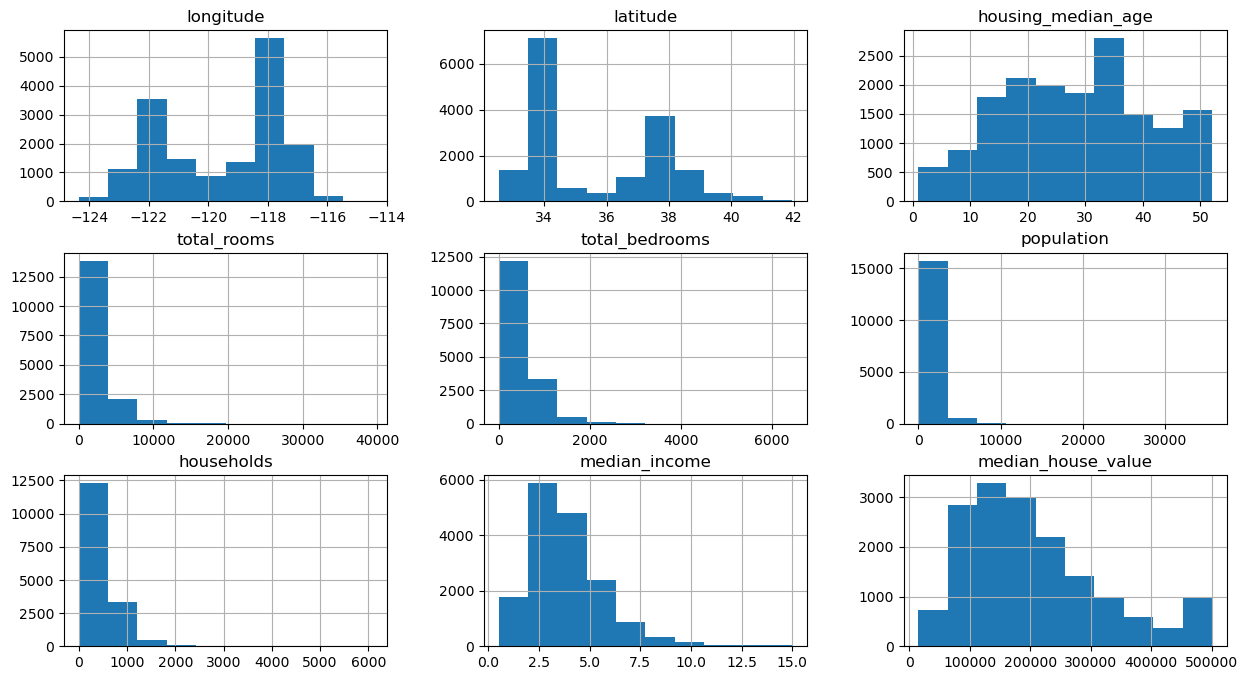

In [19]:
train_data.hist(figsize=(15, 8));

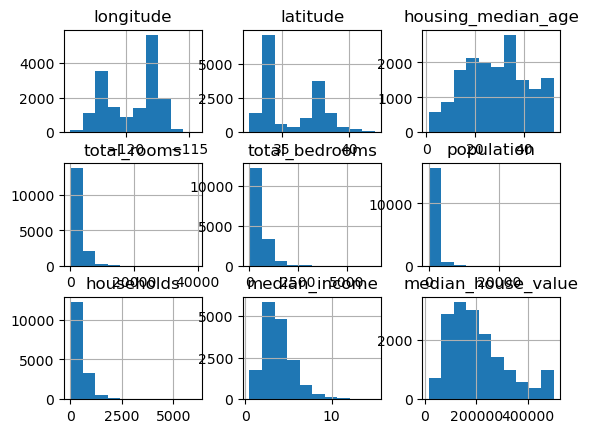

In [20]:
train_data.hist();

In [21]:
# use sns to view correlation matrix
train_data.corr()

C:\Users\Nien\AppData\Local\Temp\ipykernel_19844\3809240980.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925506,-0.115096,0.052579,0.075790,0.103318,0.062091,-0.013066,-0.037451
latitude,-0.925506,1.000000,0.020570,-0.044231,-0.073388,-0.111433,-0.077022,-0.083393,-0.152766
housing_median_age,-0.115096,0.020570,1.000000,-0.363481,-0.324475,-0.299238,-0.306903,-0.121211,0.100828
total_rooms,0.052579,-0.044231,-0.363481,1.000000,0.931277,0.857616,0.920083,0.199064,0.133158
total_bedrooms,0.075790,-0.073388,-0.324475,0.931277,1.000000,0.875588,0.979599,-0.004162,0.050270
population,0.103318,-0.111433,-0.299238,0.857616,0.875588,1.000000,0.905611,0.009195,-0.023806
households,0.062091,-0.077022,-0.306903,0.920083,0.979599,0.905611,1.000000,0.017009,0.065045
median_income,-0.013066,-0.083393,-0.121211,0.199064,-0.004162,0.009195,0.017009,1.000000,0.690201
median_house_value,-0.037451,-0.152766,0.100828,0.133158,0.050270,-0.023806,0.065045,0.690201,1.000000


C:\Users\Nien\AppData\Local\Temp\ipykernel_19844\3850011709.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu");


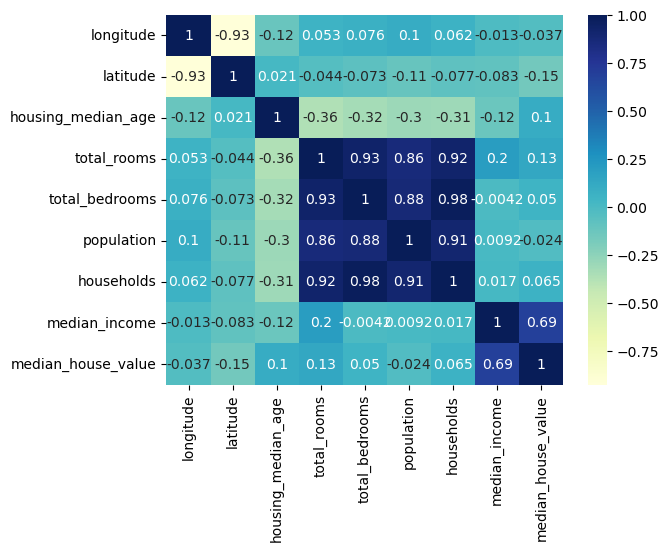

In [22]:
# plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu");

C:\Users\Nien\AppData\Local\Temp\ipykernel_19844\1512157435.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu");


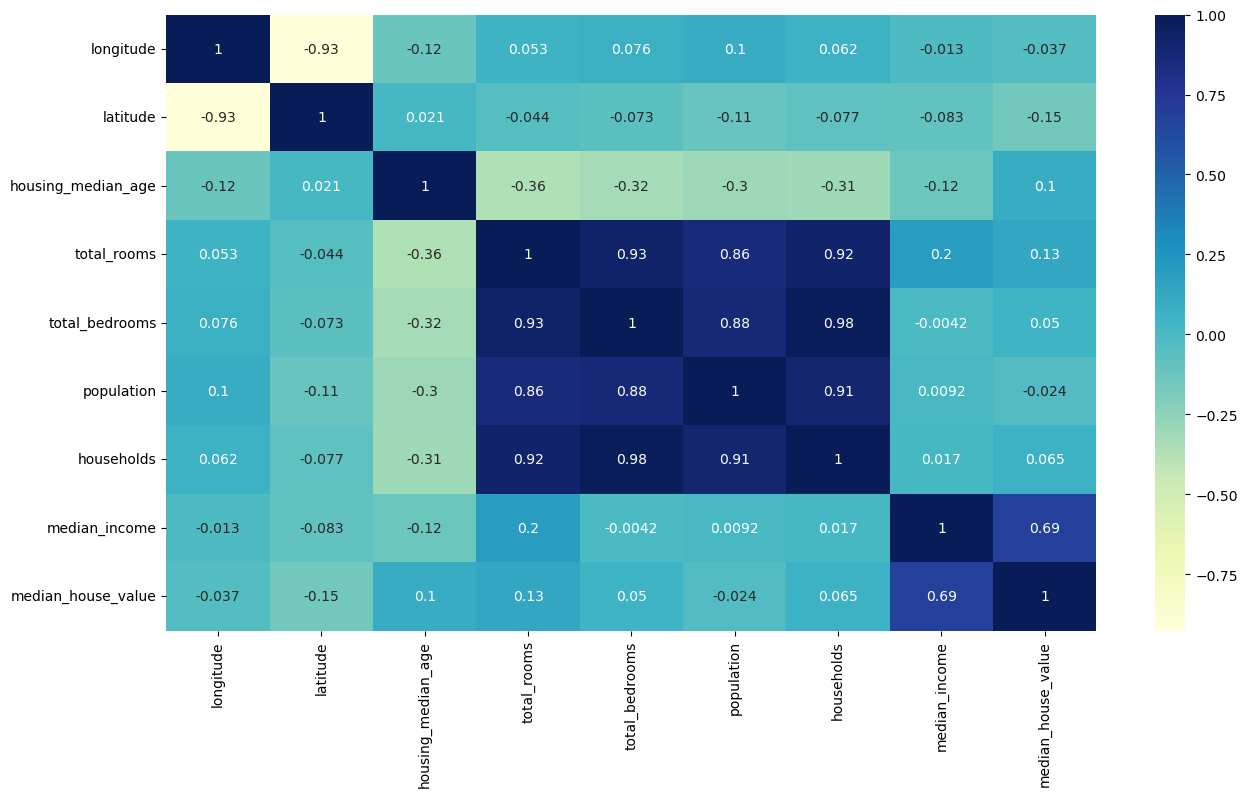

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu");

We can see that `median_income` and especially related to `median_house_value` 

## Data Preprocessing

- all the plots tend to be right skew -> not a nice gaussian belt curve

> why do we need to use np.log

We often use np.log() function in data analysis and machine learning to transform data that has a large range of values or contains outliers into a more normalized form. This is because the logarithmic transformation tends to compress larger values and expand smaller values, making the distribution of the data more symmetrical and the variance more uniform.

In [24]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)

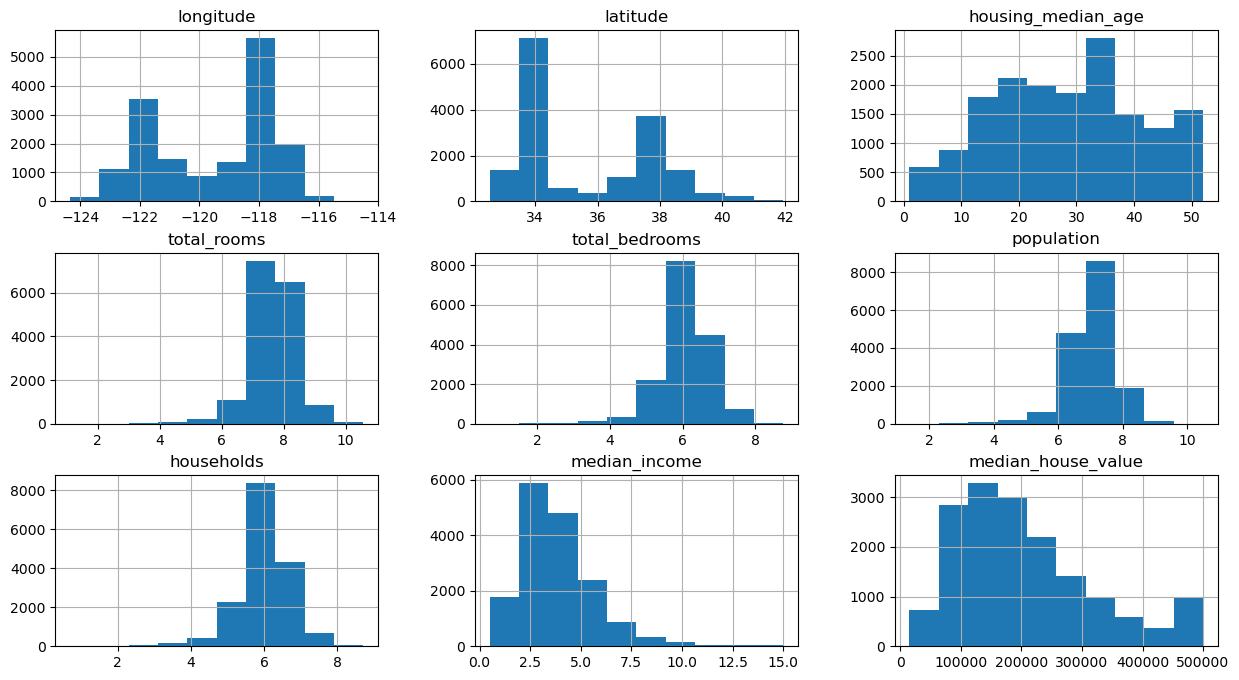

In [25]:
train_data.hist(figsize=(15, 8));

In [26]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7224
INLAND        5245
NEAR OCEAN    2056
NEAR BAY      1816
ISLAND           5
Name: ocean_proximity, dtype: int64

We will turn `<1H Ocean`, `INLAND`... to new feature which contains 1 or 0(stands for true/false)

`pd.get_dummies` is a pandas function that is used to convert categorical variables into a set of binary variables (0 and 1) for use in machine learning models. It creates new columns in the DataFrame for each unique value of the categorical variable, and then assigns a 1 or 0 to each of those columns depending on whether the original value had that category or not.

For example, consider a DataFrame with a categorical variable 'color' that has three unique values: 'red', 'green', and 'blue'. After applying pd.get_dummies to the 'color' column, the resulting DataFrame will have three new columns 'color_red', 'color_green', and 'color_blue'. If a row originally had a value of 'red' in the 'color' column, then the 'color_red' column will have a value of 1 and the other two columns will have a value of 0.

pd.get_dummies is commonly used in machine learning preprocessing to convert categorical variables into a form that can be used in models that require numerical input data.





In [27]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9333,0,0,0,0,1
10088,1,0,0,0,0
2493,0,1,0,0,0
9765,1,0,0,0,0
6861,1,0,0,0,0
...,...,...,...,...,...
6922,1,0,0,0,0
343,0,0,0,1,0
18839,0,1,0,0,0
3075,0,1,0,0,0


In [28]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop("ocean_proximity", axis=1)

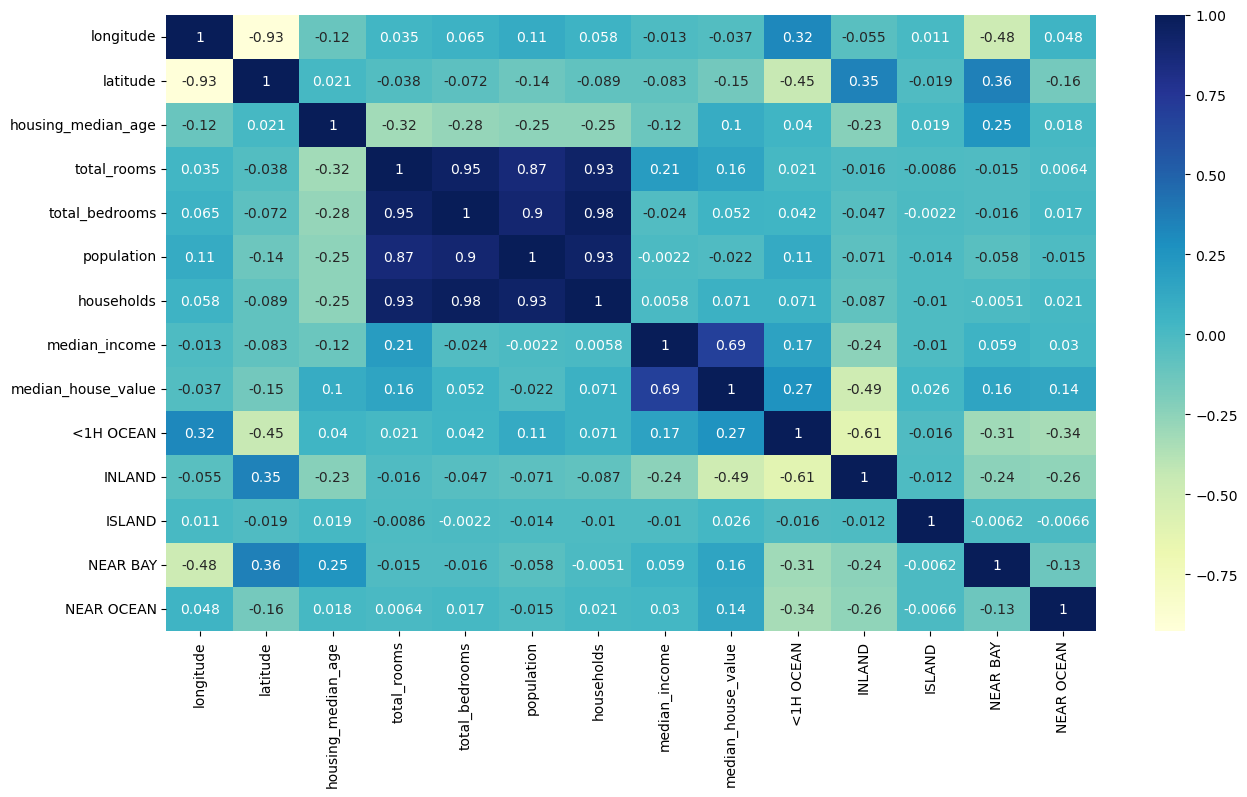

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu");

We can see that at `INLAND` the value is negative meaning that the price of the inland house you paid less than the median house value

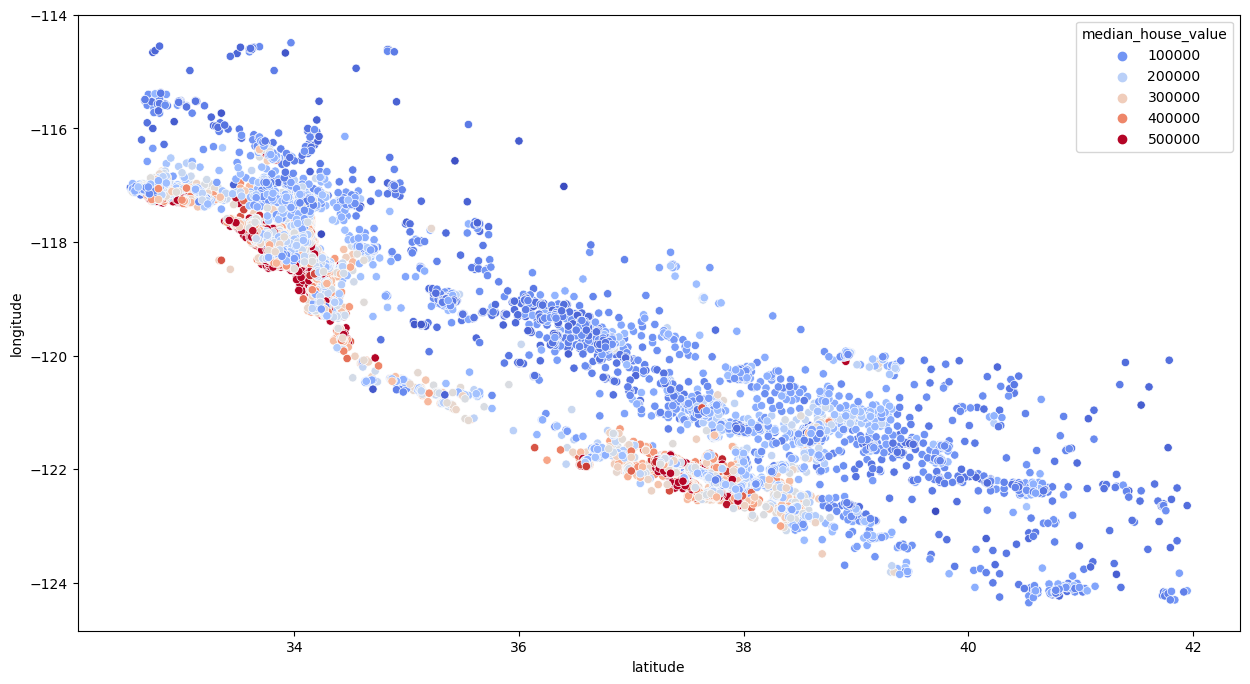

In [30]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm");

you can see that at the bottom left corner is the ocean and the price of the house near the ocean is `red` which means it really `expensive` compare to the house near the top right corner which near the land

## Feature Engineering

block with more household than usual -> has more room. so the `total_bedroom` alone can not say anything about the price

In [31]:

train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

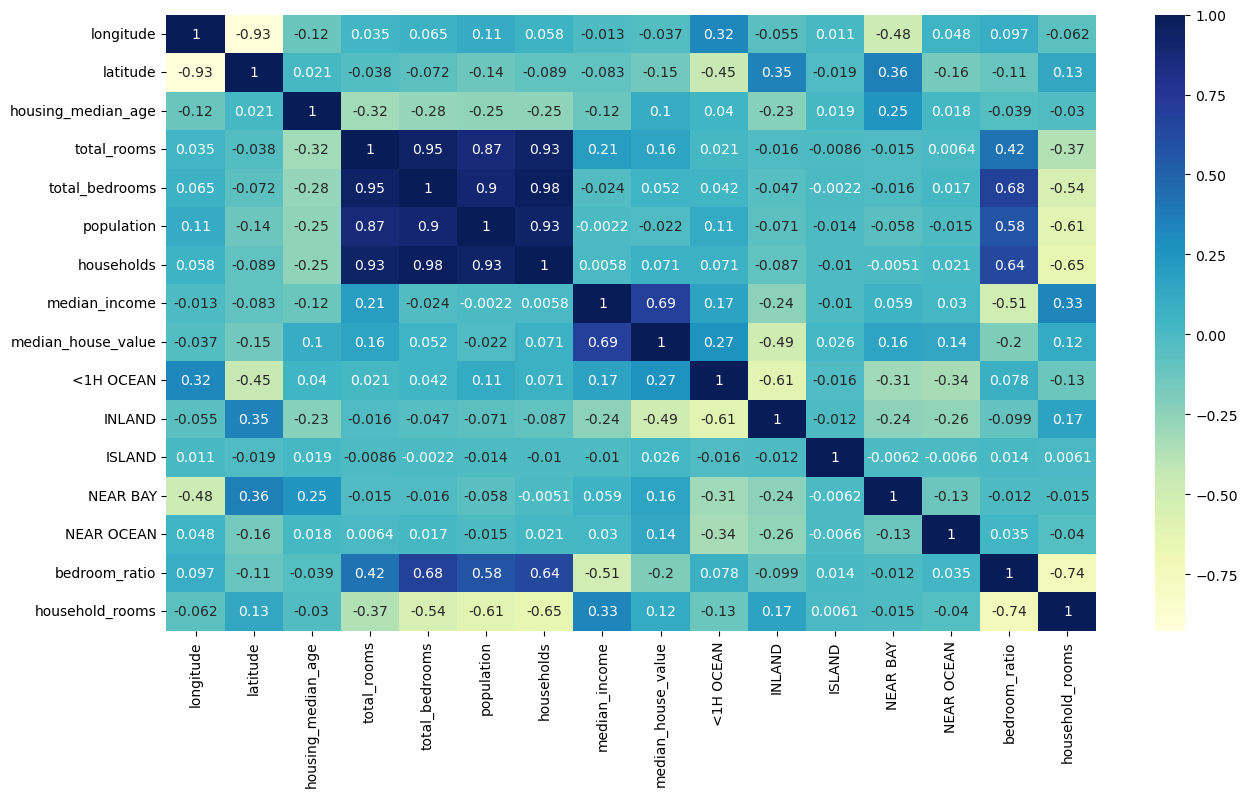

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu");

Now you can see that the bed_room ratio is related to median house value than the total badrooms

## Train models

In [33]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [34]:
def preprocessing_data(data):

    data["total_bedrooms"] = np.log(data["total_bedrooms"] + 1)
    data["total_rooms"] = np.log(data["total_rooms"] + 1)
    data["population"] = np.log(data["population"] + 1)
    data["households"] = np.log(data["households"] + 1)

    data = data.join(pd.get_dummies(data.ocean_proximity)).drop("ocean_proximity", axis=1)

    data["bedroom_ratio"] = data["total_bedrooms"] / data["total_rooms"]
    data["household_rooms"] = data["total_rooms"] / data["households"]
    return data

In [35]:
data = pd.read_csv("housing.csv")
data.dropna(inplace=True)

In [36]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data = preprocessing_data(data)

np.random.seed(42)

X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [39]:
data = data.dropna()

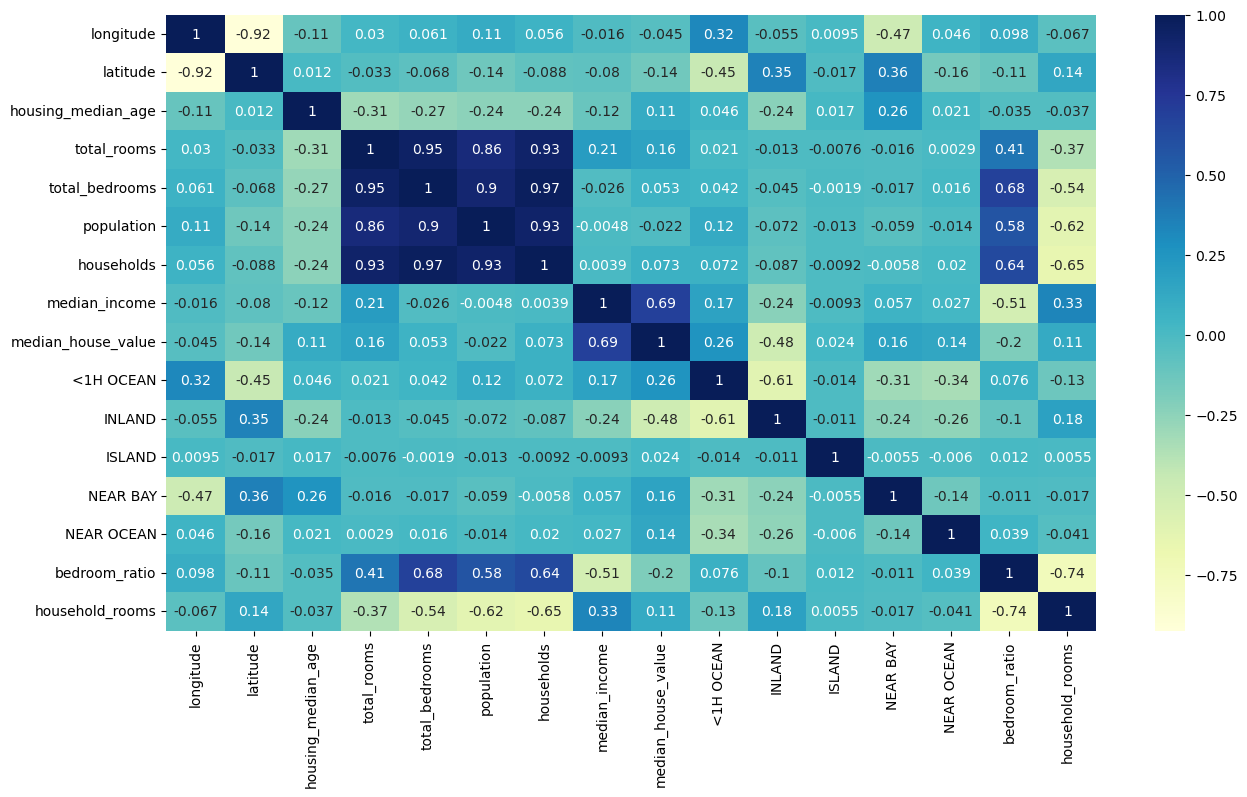

In [40]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu");

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6692303774756763

In [42]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.7675826917512194

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,  scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [44]:
best_forest = grid_search.best_estimator_

In [45]:
best_forest.score(X_test, y_test)

0.7701750584411764